In [1]:
import numpy as np
from matplotlib import pyplot as pl
import pandas as pd

# Neurona Base Radial

In [178]:
class neurona_base_radial(object):
    
    def __init__(self, datos=[], mu=[], cov=[]):
        
        self.data = pd.DataFrame(datos)
        self.media = mu
        self.dim = len(mu)
        
        #self.covarianza = self.data.cov()
        self.covarianza = cov

    def aplico(self,x):
        
        #norma = lambda k : np.exp(-0.5*((k-self.media).T@(np.linalg.inv(self.covarianza))@(k-self.media)))        
        #resultado = list(map(norma,x))

        #return resultado 
        
        return np.exp(-0.5*((x-self.media).T@(np.linalg.inv(self.covarianza))@(x-self.media)))        
        #return np.exp(-0.1*(np.dot((x-self.media).T,(x-self.media))))
        #return np.exp(-0.1*np.linalg.norm(x-self.media,ord=np.inf)**2)
    
    
    
    
    

In [210]:
data = np.loadtxt("dataset.txt")
#neurona = neurona_base_radial(data[:,0:2],data[:,0:2].mean(axis=0))
neurona1 = neurona_base_radial(data[:,0:2],np.array([3,0]),np.array([[4,2],[2,9]]))
neurona2 = neurona_base_radial(data[:,0:2],np.array([-3,7]),np.array([[4,1],[1,4]]))

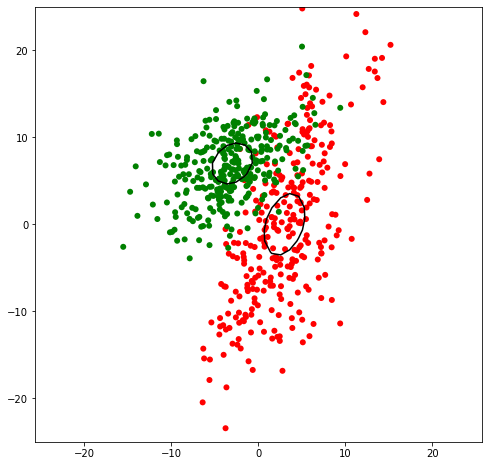

In [217]:
img = np.array(np.meshgrid(np.linspace(-20,20,40), np.linspace(-25,25,40)))
img = np.transpose(img, axes=[2,1,0])


z1 = [[neurona1.aplico(x) for x in y] for y in img]
z2 = [[neurona2.aplico(x) for x in y] for y in img]

pl.figure(figsize=(8, 8))
pl.axis()

pl.contour(img[:,:,0], img[:,:,1], z1, [.5], colors=['#000000'])
pl.contour(img[:,:,0], img[:,:,1], z2, [.5], colors=['#000000'])

color1 = ['r' if i==1 else 'g' for i in data[:,2]]

pl.scatter(data[:,0:2].T[0], data[:,0:2].T[1], c=color1, linewidths=0)
#pl.title('Calculo con k:{} y norma orden:{}'.format(K,orden_norma),fontsize='xx-large')
pl.axis('equal');

In [203]:
np.linalg.inv([[4,1],[1,4]])

array([[ 0.26666667, -0.06666667],
       [-0.06666667,  0.26666667]])